<a href="https://colab.research.google.com/github/Adrianus-Bagas/Sentiment_Analysis/blob/main/Sentiment_Analysis_(Preprocessing_%2B_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen pada Hasil Review Produk (Preprocessing+Model)

## 1. Import beberapa libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## 2. Memuat data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/dataset/review lapak.csv")
data

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [4]:
data = data.dropna()
data

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [5]:
data = data.drop_duplicates(subset=["review_sangat_singkat"])
data

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


## 3. Text Preprocessing

In [6]:
def preprocess_text(main_df):
  df = data.copy()
  # factory = StemmerFactory()
  # stemmer = factory.create_stemmer()
  nltk.download('stopwords')
  # nltk.download('punkt')
  stop = stopwords.words('indonesian')  
  df['review_sangat_singkat'] = df['review_sangat_singkat'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
  df['review_sangat_singkat'] = df['review_sangat_singkat'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
  # df['review_sangat_singkat'] = df['review_sangat_singkat'].apply(lambda x: stemmer.stem(x))

  return df

In [7]:
new_data = preprocess_text(data)
new_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,mantaps,1
2,2,Barang Sesuai,terima kasih buka lapaklapak barang sesuai mem...,1
3,3,Barang Asli,barang asli,1
4,4,Mmc 32 Gb. Samsung,packing rapih barang sesuai pesanan cepat,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,sampai blm dicobasemoga bermanfaat,1
96325,96325,Biasa Saja,barangnya sesuai harganya thanks sda pakai,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,respon nya bagus ramah barang cpt sampai makas...,1


## 4. Word Embedding

In [8]:
unique_string = set()
for x in new_data["review_sangat_singkat"]:
    for y in x.split():
        unique_string.add(y)
        
print(len(unique_string))

48349


In [9]:
len_data = [len(x.split()) for x in new_data["review_sangat_singkat"]]
print(np.mean(len_data))
print(np.median(len_data))
print(np.std(len_data))
print(np.min(len_data))
print(np.max(len_data))
print(np.percentile(len_data, 98))

6.634412793030321
5.0
5.458851205953595
0
163
22.0


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_sequence_length = 22
max_words = 50000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(new_data["review_sangat_singkat"])
sequences = tokenizer.texts_to_sequences(new_data["review_sangat_singkat"])

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences,maxlen=max_sequence_length)

In [12]:
import gensim
path = '/content/drive/MyDrive/model/idwiki_word2vec_100.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)

In [13]:
index2word_set = set(id_w2v.wv.index2word)

In [14]:
word_index = tokenizer.word_index
nb_words = max_words
embedding_matrix = np.zeros((nb_words, 100), dtype=np.float32)
unknown_vector = np.zeros((100,), dtype=np.float32) - 1.
for word, i in word_index.items():
    cur = word
    if cur in index2word_set:
        embedding_matrix[i] = id_w2v[cur]
        continue
        
    embedding_matrix[i] = unknown_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [15]:
embedding_matrix.shape

(50000, 100)

In [16]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D, GlobalMaxPooling1D, Concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import callbacks

from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    
    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_model_bigru():
    inp = Input(shape=(max_sequence_length,))
    x = Embedding(max_words, 100, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.3)(x)
    x1 = Bidirectional(GRU(32, return_sequences=True))(x)
    x2 = Bidirectional(GRU(32, return_sequences=True))(x1)
    max_pool1 = GlobalMaxPooling1D()(x1)
    max_pool2 = GlobalMaxPooling1D()(x2)
    conc = Concatenate()([max_pool1, max_pool2])
    x = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
    return model

def get_model_gru():
    inp = Input(shape=(max_sequence_length,))
    x = Embedding(max_words, 100, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.3)(x)
    x1 = GRU(32, return_sequences=True)(x)
    x2 = GRU(32, return_sequences=True)(x1)
    max_pool1 = GlobalMaxPooling1D()(x1)
    max_pool2 = GlobalMaxPooling1D()(x2)
    conc = Concatenate()([max_pool1, max_pool2])
    x = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
    return model

In [17]:
from sklearn.model_selection import KFold
def get_kfold():
    return KFold(n_splits=5, shuffle=True, random_state=1)

In [18]:
X = padded_sequences
y = new_data["label"].values

pred_cv_bigru = np.zeros(len(y))
count = 0
train_bigru = []
test_bigru = []

for train_index, test_index in get_kfold().split(X, y):
    count += 1
    print(count, end='')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_bigru.append(train_index)
    test_bigru.append(test_index)
    
    es = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8,
                                             verbose=1, mode='min', baseline=None, restore_best_weights=True)

    rlr = callbacks.ReduceLROnPlateau(monitor='val_f1', factor=0.5,
                                      patience=3, min_lr=1e-6, mode='max', verbose=1)
    
    
    model = get_model_bigru()
    model.fit(X_train, 
             y_train, batch_size=16, epochs=5,
             validation_data=(X_test, y_test),
             callbacks=[es, rlr],
             verbose=1)
    
    pred_cv_bigru[[test_index]] += model.predict(X_test)[:,0]

1Epoch 1/5
4362/4362 [==============================] - 156s 34ms/step - loss: 0.2817 - f1: 0.9328 - val_loss: 0.2563 - val_f1: 0.9396 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 144s 33ms/step - loss: 0.2578 - f1: 0.9380 - val_loss: 0.2500 - val_f1: 0.9405 - lr: 0.0010
Epoch 3/5
4362/4362 [==============================] - 144s 33ms/step - loss: 0.2512 - f1: 0.9402 - val_loss: 0.2497 - val_f1: 0.9421 - lr: 0.0010
Epoch 4/5
4362/4362 [==============================] - 147s 34ms/step - loss: 0.2458 - f1: 0.9408 - val_loss: 0.2462 - val_f1: 0.9427 - lr: 0.0010
Epoch 5/5
4362/4362 [==============================] - 146s 33ms/step - loss: 0.2429 - f1: 0.9421 - val_loss: 0.2425 - val_f1: 0.9428 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


546/546 [==============================] - 6s 9ms/step
2Epoch 1/5
4362/4362 [==============================] - 156s 34ms/step - loss: 0.2815 - f1: 0.9328 - val_loss: 0.2597 - val_f1: 0.9363 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 154s 35ms/step - loss: 0.2594 - f1: 0.9379 - val_loss: 0.2482 - val_f1: 0.9408 - lr: 0.0010
Epoch 3/5
4362/4362 [==============================] - 158s 36ms/step - loss: 0.2529 - f1: 0.9395 - val_loss: 0.2459 - val_f1: 0.9416 - lr: 0.0010
Epoch 4/5
4362/4362 [==============================] - 146s 34ms/step - loss: 0.2472 - f1: 0.9408 - val_loss: 0.2448 - val_f1: 0.9415 - lr: 0.0010
Epoch 5/5
546/546 [==============================] - 8s 11ms/step
3Epoch 1/5
4362/4362 [==============================] - 166s 36ms/step - loss: 0.2806 - f1: 0.9334 - val_loss: 0.2532 - val_f1: 0.9372 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 146s 33ms/step - loss: 0.2576 - f1: 0.9385 - val_loss: 0.2542 - val_f1: 0.9386 - lr: 0.

In [19]:
pred_cv_gru = np.zeros(len(y))
count = 0
train_gru = []
test_gru = []

for train_index, test_index in get_kfold().split(X, y):
    count += 1
    print(count, end='')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_gru.append(train_index)
    test_gru.append(test_index)
    
    es = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8,
                                             verbose=1, mode='min', baseline=None, restore_best_weights=True)

    rlr = callbacks.ReduceLROnPlateau(monitor='val_f1', factor=0.5,
                                      patience=3, min_lr=1e-6, mode='max', verbose=1)
    
    
    model = get_model_gru()
    model.fit(X_train, 
             y_train, batch_size=16, epochs=5,
             validation_data=(X_test, y_test),
             callbacks=[es, rlr],
             verbose=1)
    
    pred_cv_gru[[test_index]] += model.predict(X_test)[:,0]

1Epoch 1/5
4362/4362 [==============================] - 230s 51ms/step - loss: 0.2868 - f1: 0.9328 - val_loss: 0.2624 - val_f1: 0.9381 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 201s 46ms/step - loss: 0.2633 - f1: 0.9362 - val_loss: 0.2529 - val_f1: 0.9398 - lr: 0.0010
Epoch 3/5
4362/4362 [==============================] - 144s 33ms/step - loss: 0.2568 - f1: 0.9384 - val_loss: 0.2530 - val_f1: 0.9408 - lr: 0.0010
Epoch 4/5
4362/4362 [==============================] - 126s 29ms/step - loss: 0.2529 - f1: 0.9388 - val_loss: 0.2541 - val_f1: 0.9414 - lr: 0.0010
Epoch 5/5
4362/4362 [==============================] - 122s 28ms/step - loss: 0.2495 - f1: 0.9398 - val_loss: 0.2479 - val_f1: 0.9403 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


546/546 [==============================] - 4s 6ms/step
2Epoch 1/5
4362/4362 [==============================] - 112s 25ms/step - loss: 0.2894 - f1: 0.9316 - val_loss: 0.2567 - val_f1: 0.9382 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 117s 27ms/step - loss: 0.2640 - f1: 0.9371 - val_loss: 0.2497 - val_f1: 0.9391 - lr: 0.0010
Epoch 3/5
4362/4362 [==============================] - 103s 24ms/step - loss: 0.2579 - f1: 0.9379 - val_loss: 0.2494 - val_f1: 0.9389 - lr: 0.0010
Epoch 4/5
4362/4362 [==============================] - 107s 25ms/step - loss: 0.2541 - f1: 0.9392 - val_loss: 0.2453 - val_f1: 0.9401 - lr: 0.0010
Epoch 5/5
546/546 [==============================] - 5s 8ms/step
3Epoch 1/5
4362/4362 [==============================] - 124s 27ms/step - loss: 0.2870 - f1: 0.9318 - val_loss: 0.2604 - val_f1: 0.9373 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 106s 24ms/step - loss: 0.2640 - f1: 0.9373 - val_loss: 0.2544 - val_f1: 0.9385 - lr: 0.0

In [20]:
X_train, X_test = X[train_bigru[0]], X[test_bigru[0]]
y_train, y_test = y[train_bigru[0]], y[test_bigru[0]]
es = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8,
                                             verbose=1, mode='min', baseline=None, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_f1', factor=0.5,
                                      patience=3, min_lr=1e-6, mode='max', verbose=1)
    
model_bigru = get_model_bigru()
history = model_bigru.fit(X_train, 
             y_train, batch_size=16, epochs=5,
             validation_data=(X_test, y_test),
             callbacks=[es, rlr],
             verbose=1)

Epoch 1/5
4362/4362 [==============================] - 177s 38ms/step - loss: 0.2833 - f1: 0.9317 - val_loss: 0.2605 - val_f1: 0.9392 - lr: 0.0010
Epoch 2/5
4362/4362 [==============================] - 156s 36ms/step - loss: 0.2607 - f1: 0.9378 - val_loss: 0.2490 - val_f1: 0.9416 - lr: 0.0010
Epoch 3/5
4362/4362 [==============================] - 173s 40ms/step - loss: 0.2509 - f1: 0.9394 - val_loss: 0.2467 - val_f1: 0.9428 - lr: 0.0010
Epoch 4/5
4362/4362 [==============================] - 187s 43ms/step - loss: 0.2463 - f1: 0.9412 - val_loss: 0.2454 - val_f1: 0.9428 - lr: 0.0010
Epoch 5/5
4362/4362 [==============================] - 163s 37ms/step - loss: 0.2421 - f1: 0.9426 - val_loss: 0.2476 - val_f1: 0.9433 - lr: 0.0010


In [21]:
# model_bigru.save('/content/drive/MyDrive/model/model bigru.h5')

In [22]:
# import pickle

# # to save the fitted tokenizer
# with open('/content/drive/MyDrive/model/tokenizer sentiment analysis.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

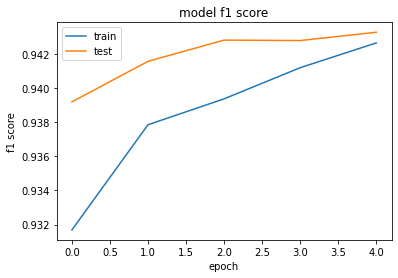

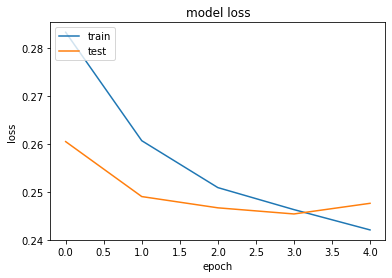

In [23]:
import matplotlib.pyplot as plt
# accuracy plot 
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()